# Multiclass Image detection: Electronics Components

## Overview

The purpose of this notebook is to analyze the data and make a multiclass image detection model to determine which electronic component is shown on the input image.

The training data is available in [kaggle](https://www.kaggle.com/datasets/olavomendes/elec-dataset)

It contains images labeled as one of the 5 classes we are interested in (led, potentiometer, push_button, resistor or ultrasonic sensor)


In [48]:
import numpy as np
import tensorflow as tf
from tensorflow import keras


from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input

from tensorflow.keras.preprocessing.image import load_img 
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [49]:
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.compat.v1.Session(config=config)

2023-01-26 03:18:52.764360: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-26 03:18:52.764984: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-26 03:18:52.765458: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-26 03:18:52.765966: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-26 03:18:52.766424: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from S

In [50]:
labels = {
    0: 'led',
    1: 'potentiometer',
    2: 'push_button',
    3: 'resistor',
    4: 'ultrasonic_sensor'
}

input_path = 'electronics_dataset/'

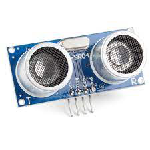

In [51]:
image_size = (150, 150)
model = keras.models.load_model('xception_v2_0_8_30_0.951.h5')

path = 'electronics_dataset/ultrasonic_sensor_test_image.jpg'
img = load_img(path, target_size=(image_size))
img

pre-process the image:

In [52]:
x = np.array(img)
X = np.array([x])
X = preprocess_input(X)


In [53]:
pred = model.predict(X)
pred[0]

1/1 [==============================] - 1s 613ms/step


array([-6.9745803, -4.7076583, -1.1828318, -5.9461327, 15.126863 ],
      dtype=float32)

In [54]:
pred[0].argmax()

4

In [55]:
labels[pred[0].argmax()]

'ultrasonic_sensor'

In [56]:
dict(zip(labels, pred[0]))

{0: -6.9745803, 1: -4.7076583, 2: -1.1828318, 3: -5.9461327, 4: 15.126863}